In [40]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
y_true_df = pd.read_csv('final_y_true.csv')
y_pred_df = pd.read_csv('final_y_pred.csv')
y_score_df = pd.read_csv('final_y_prob.csv')

In [42]:
y_true = y_true_df['labels']
y_pred = y_pred_df['predicted_label']
y_score = y_score_df['1']

In [43]:
rpt = pd.DataFrame(classification_report(y_true, y_pred, labels=[0,1], target_names=['Accepted','Terminated'], sample_weight=None, output_dict=True, zero_division='warn')).T.round(4)
rpt = rpt.drop('weighted avg', axis=0)
accuracy = rpt.loc['accuracy','precision']
rpt = rpt.drop('accuracy', axis=0)
rpt

,precision,recall,f1-score,support
Accepted,0.9079,0.7953,0.8479,1959.0
Terminated,0.3840,0.6127,0.4721,408.0
macro avg,0.6460,0.7040,0.6600,2367.0


In [66]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9229


In [67]:
raw_conf_matrix = confusion_matrix(y_true, y_pred, labels=[0,1], sample_weight=None, normalize=None)
norm_conf_matrix = confusion_matrix(y_true, y_pred, labels=[0,1], sample_weight=None, normalize='true')

<Axes: >

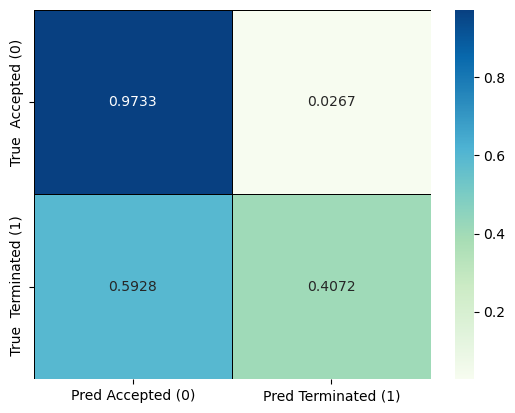

In [69]:
sns.heatmap(norm_conf_matrix, cmap='GnBu', annot=True, fmt='.4f', linecolor='black', linewidths=0.5, xticklabels=['Pred Accepted (0)', 'Pred Terminated (1)'], yticklabels=['True  Accepted (0)', ' True  Terminated (1)'])

<Axes: >

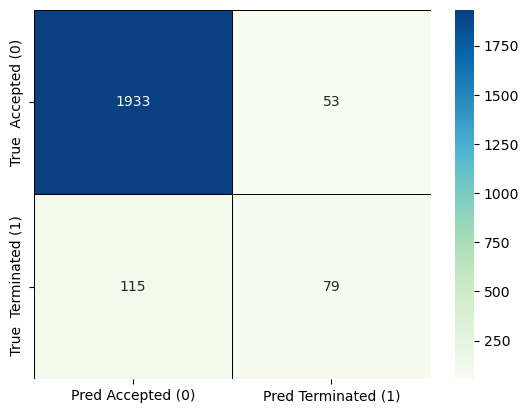

In [70]:
sns.heatmap(raw_conf_matrix, cmap='GnBu', annot=True, fmt='.0f', linecolor='black', linewidths=0.5, xticklabels=['Pred Accepted (0)', 'Pred Terminated (1)'], yticklabels=['True  Accepted (0)', ' True  Terminated (1)'])

In [71]:
fpr, tpr, threshold = roc_curve(y_true, y_score, sample_weight=None, drop_intermediate=True)
AUC_ROC = roc_auc_score(y_true, y_score)

Text(0.5, 1.0, 'AUC-ROC Curve')

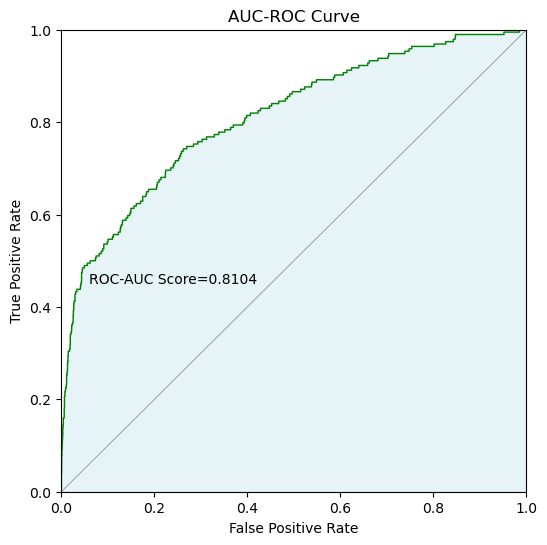

In [72]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='green', linewidth=1)
plt.fill_between(fpr, tpr, y2=0, alpha=0.3, color='lightblue')
plt.plot([0,1], [0,1], color='gray', linewidth=0.5)
plt.text(0.06, 0.45, f'ROC-AUC Score={AUC_ROC:.4f}')

plt.xlim((0,1))
plt.ylim((0,1))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')